In [2]:
!pip install numpy
!pip install pandas

  Using cached numpy-1.24.4-cp38-cp38-win_amd64.whl (14.9 MB)
  Using cached pandas-2.0.3-cp38-cp38-win_amd64.whl (10.8 MB)
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
  Using cached pytz-2023.3.post1-py2.py3-none-any.whl (502 kB)


In [3]:
!pip install matplotlib

  Using cached matplotlib-3.7.3-cp38-cp38-win_amd64.whl (7.5 MB)
     ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
     - -------------------------------------- 0.1/2.6 MB 2.2 MB/s eta 0:00:02
     ---- ----------------------------------- 0.3/2.6 MB 3.2 MB/s eta 0:00:01
     -------------- ------------------------- 1.0/2.6 MB 6.8 MB/s eta 0:00:01
     -------------------------------------- - 2.5/2.6 MB 13.5 MB/s eta 0:00:01
     ---------------------------------------- 2.6/2.6 MB 12.8 MB/s eta 0:00:00
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached fonttools-4.43.1-cp38-cp38-win_amd64.whl (1.5 MB)
  Using cached kiwisolver-1.4.5-cp38-cp38-win_amd64.whl (56 kB)
  Using cached importlib_resources-6.1.0-py3-none-any.whl (33 kB)
  Using cached contourpy-1.1.1-cp38-cp38-win_amd64.whl (477 kB)
  Using cached pyparsing-3.1.1-py3-none-any.whl (103 kB)


In [15]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt


data_x_df = pd.read_csv('dataset_X.csv')
data_t_df = pd.read_csv('dataset_T.csv')

print((data_x_df.shape))
print(data_t_df.shape)


data_x_df
# convert Yes No to 1 0
data_x_df = data_x_df.replace('Yes', 1)
data_x_df = data_x_df.replace('No', 0)
data_x_df

(10000, 5)
(10000, 1)


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,1,9,1
1,4,82,0,4,2
2,8,51,1,7,2
3,5,52,1,5,2
4,7,75,0,8,5
...,...,...,...,...,...
9995,1,49,1,4,2
9996,7,64,1,8,5
9997,6,83,1,8,5
9998,9,97,1,7,0


In [16]:
# Data preprocessing
data_x_df = ((data_x_df - data_x_df.mean()) / data_x_df.std())  # Normalize
# data_x_df = data_x_df.reindex(np.random.permutation(data_x_df.index)) # Random Permutaion

Split_ratio = 0.8
train_len = 8000 # int(data_x_df.to_numpy().shape[0]* Split_ratio)
D = 5

X_train = data_x_df.iloc[:train_len,:]
X_val = data_x_df.iloc[train_len: , :]
y_train = data_t_df.iloc[:train_len, :]
y_val = data_t_df.iloc[train_len:, :]

# if yes then add 1

print(X_train.to_numpy().shape)
print(X_val.to_numpy().shape)
data_x_df

(8000, 5)
(2000, 5)


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,0.775149,1.704090,1.010404,1.456132,-1.249691
1,-0.383461,0.723876,-0.989604,-1.492220,-0.900937
2,1.161352,-1.063573,1.010404,0.276791,-0.900937
3,0.002742,-1.005913,1.010404,-0.902549,-0.900937
4,0.775149,0.320259,-0.989604,0.866462,0.145326
...,...,...,...,...,...
9995,-1.542072,-1.178892,1.010404,-1.492220,-0.900937
9996,0.775149,-0.313997,1.010404,0.866462,0.145326
9997,0.388945,0.781536,1.010404,0.866462,0.145326
9998,1.547556,1.588771,1.010404,0.276791,-1.598446


In [17]:
data_t_df

,Performance Index
0,91.0
1,65.0
2,45.0
3,36.0
4,66.0
...,...
9995,23.0
9996,58.0
9997,74.0
9998,95.0


## 2.1(a)

In [18]:
#Generate the Phi matrix for M=1
Phi_matrix_train_M1 = np.concatenate([np.ones([1, len(X_train)]).T, X_train.to_numpy()], axis=1)
Phi_matrix_val_M1 = np.concatenate([np.ones([1, len(X_val)]).T, X_val.to_numpy()], axis=1)

In [19]:
M1_Weight = (np.linalg.inv(Phi_matrix_train_M1.T @ Phi_matrix_train_M1) @ Phi_matrix_train_M1.T) @ data_t_df.iloc[:train_len,:]

$$\boldsymbol{w}=\left(\boldsymbol{\Phi}^T \boldsymbol{\Phi}\right)^{-1} \boldsymbol{\Phi}^T \mathbf{t}$$

In [20]:
def RMSE(predictions, targets):
    return np.sqrt(np.square((predictions - targets)).mean())

In [21]:
M1_train_pred = np.dot(M1_Weight.T, Phi_matrix_train_M1.T)
M1_val_pred = np.dot(M1_Weight.T, Phi_matrix_val_M1.T)
M1_RMSE_train_Orig = RMSE(M1_train_pred, y_train.to_numpy().T)
M1_RMSE_val_Orig = RMSE(M1_val_pred, y_val.to_numpy().T)

In [22]:
# Generate the Phi matrix for M=2

def M2_Phi_Matrix(dataset:np.array, D:int):
    tmp_matrix = np.zeros((len(dataset), D*D))
    for row in range(len(dataset)):
        count=0
        for i in range(dataset.shape[1]):
            for j in range(dataset.shape[1]):
                tmp_matrix[row,count] = dataset[row,i] * dataset[row,j]
                count = count + 1
    return tmp_matrix
    
tmp_matrix_train = M2_Phi_Matrix(X_train.to_numpy(), D)
tmp_matrix_val = M2_Phi_Matrix(X_val.to_numpy(), D)
Phi_matrix_train_M2 = np.concatenate([Phi_matrix_train_M1, tmp_matrix_train], axis=1)
Phi_matrix_val_M2 = np.concatenate([Phi_matrix_val_M1, tmp_matrix_val], axis=1)

In [23]:
M2_Weight = (np.linalg.pinv(Phi_matrix_train_M2.T @ Phi_matrix_train_M2) @ Phi_matrix_train_M2.T) @ y_train
M2_train_pred = np.dot(M2_Weight.T, Phi_matrix_train_M2.T)
M2_val_pred = np.dot(M2_Weight.T, Phi_matrix_val_M2.T)

M2_RMSE_train = RMSE(M2_train_pred, y_train.to_numpy().T)
M2_RMSE_val = RMSE(M2_val_pred, y_val.to_numpy().T)

In [24]:
print('M1_RMSE_train: ', M1_RMSE_train_Orig)
print('M1_RMSE_val: ', M1_RMSE_val_Orig)
print('M2_RMSE_train: ', M2_RMSE_train)
print('M2_RMSE_val: ', M2_RMSE_val)

M1_RMSE_train:  2.031761450807104
M1_RMSE_val:  2.060869473062509
M2_RMSE_train:  2.029517900990365
M2_RMSE_val:  2.0648657388736464


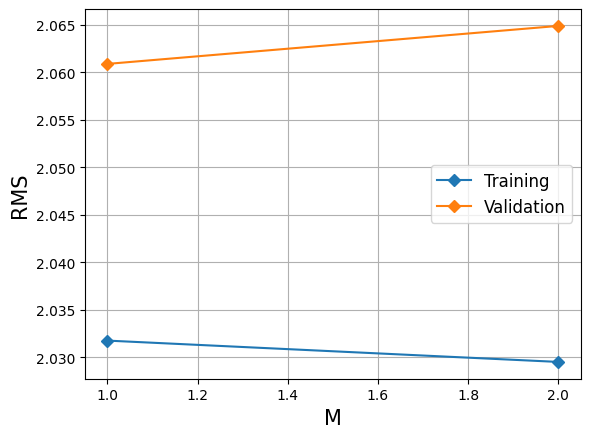

In [25]:
plt.xlabel('M', fontsize = 15)
plt.ylabel('RMS', fontsize = 15)
plt.plot([1,2],[M1_RMSE_train_Orig, M2_RMSE_train],marker = "D",label='Training')
plt.plot([1,2],[M1_RMSE_val_Orig, M2_RMSE_val],marker = "D",label='Validation')
plt.legend(loc=0, fontsize = 12)
plt.grid(True)
plt.show()

## 2.1(b)

In [26]:
M1_Weight_MAX = np.argmax(np.abs(M1_Weight[1:]))
print(f'The most contributive feature is: \'{data_x_df.columns[M1_Weight_MAX]}\' ')

The most contributive feature is: 'Previous Scores' 


* Because of the `M1_Weight` is the coefficient of linear model, so **the largest weight(absolute value) is the most contributive feature**.
* And following analysis is *"Removing one of the features and compare with original data"*.

In [27]:
feature_list = data_x_df.columns.tolist() # ['fixed acidity', ... , 'alcohol']
train_data_list = []
M1_RMSE_train_list =[]
M1_RMSE_val_list = []
err_list = []
for i in range(len(feature_list)):
    globals()['data_wo_ft'+str(i)] = np.delete(data_x_df.values, i, 1)
    train_data_list.append(globals()['data_wo_ft'+str(i)])
    # print(globals()['data_wo_ft'+str(i)])

In [28]:
#Gernerate Phi matrix 
for feature in range(D):
    tmp_matrix_train = M2_Phi_Matrix(train_data_list[feature][:train_len,:], D)
    tmp_matrix_val = M2_Phi_Matrix(train_data_list[feature][train_len:,:], D)
    Phi_matrix_train = np.concatenate([np.ones([1, len(X_train)]).T, train_data_list[feature][:train_len,:]], axis=1)
    Phi_matrix_val = np.concatenate([np.ones([1, len(X_val)]).T, train_data_list[feature][train_len:, :]], axis=1)
    #Weight of M=1
    M1_Weight = (np.linalg.pinv(Phi_matrix_train.T @ Phi_matrix_train) @ Phi_matrix_train.T) @ data_t_df.iloc[:train_len,:]
    M1_train_pred = np.dot(M1_Weight.T, Phi_matrix_train.T)
    M1_val_pred = np.dot(M1_Weight.T, Phi_matrix_val.T)
    #Calculate RMSE
    M1_RMSE_train = RMSE(M1_train_pred, y_train.to_numpy().T)
    M1_RMSE_val = RMSE(M1_val_pred, y_val.to_numpy().T)
    M1_RMSE_train_list.append(M1_RMSE_train)
    M1_RMSE_val_list.append(M1_RMSE_val)
    err_list.append(np.abs(M1_RMSE_train - M1_RMSE_train_Orig))
    #print(f"Without: {feature_list[feature]}")
    #print("M1_RMSE_train: ", M1_RMSE_train_list[feature])
    #print("M1_RMSE_val:  ", M1_RMSE_val_list[feature], "\n")

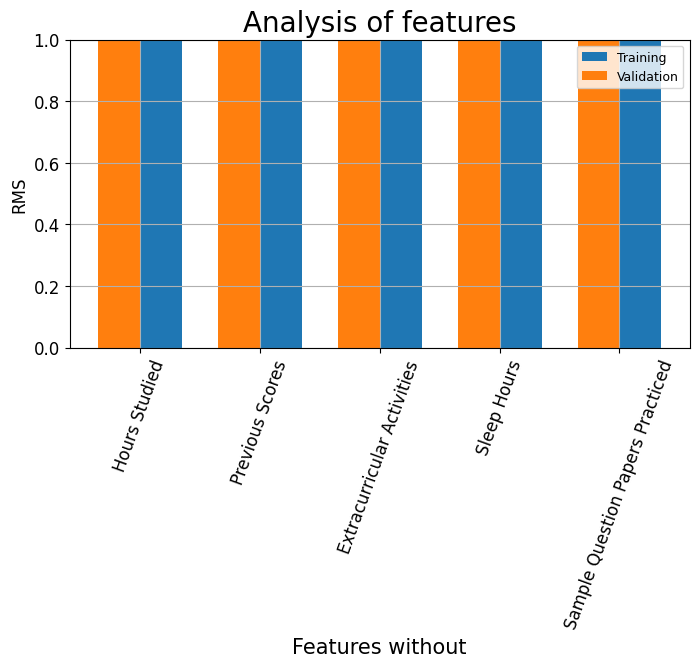

In [29]:
plt.figure(figsize=(8,4))
plt.xticks(fontsize = 12)
plt.xticks(rotation = 70)
plt.yticks(fontsize = 12)
plt.bar(feature_list, M1_RMSE_train_list, label = 'Training', align = "edge", width = 0.35)
plt.bar(feature_list, M1_RMSE_val_list, label = 'Validation', align = "edge", width = -0.35)
plt.title("Analysis of features", fontsize = 20)
plt.xlabel("Features without", fontsize = 15)
plt.ylabel("RMS", fontsize = 12)
plt.ylim(0,1)
plt.legend(loc=0, fontsize = 9)
plt.grid(True)
plt.show()

* We can find that RMSE of removing `alcohol`  compare with the original RMSE is the largest value.

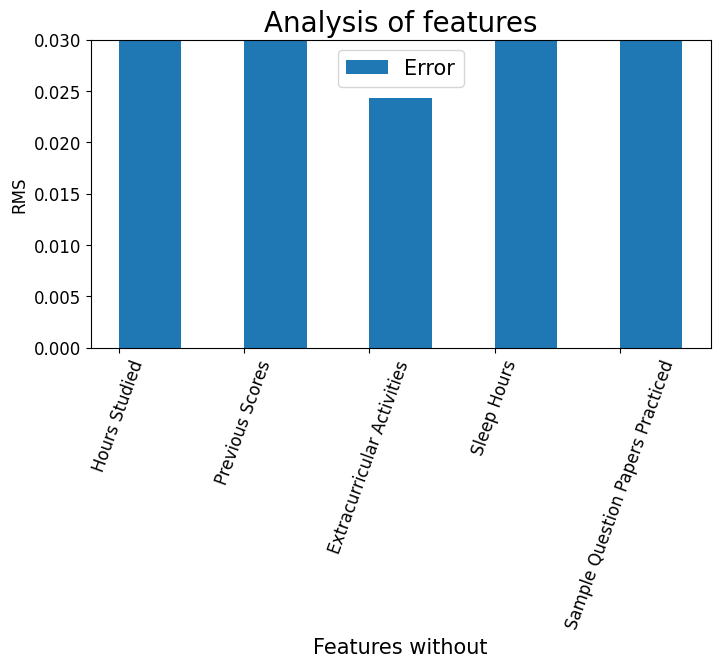

In [30]:
plt.figure(figsize=(8,4))
plt.xticks(fontsize = 12)
plt.xticks(rotation = 70)
plt.yticks(fontsize = 12)
plt.bar(feature_list, err_list, label = 'Error', align = "edge", width = 0.5)
plt.title("Analysis of features", fontsize = 20)
plt.xlabel("Features without", fontsize = 15)
plt.ylabel("RMS", fontsize = 12)
plt.ylim(0,0.03)
plt.legend(loc=0, fontsize = 15)
plt.show()

The correlation coefficient of features and target 

In [31]:
#Correalation coefficient

data_x_df_corr = data_x_df.copy()
data_x_df_corr['taget correlation'] = data_t_df.values
data_x_df_corr.corr()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,taget correlation
Hours Studied,1.000000,-0.012390,0.003873,0.001245,0.017463,0.373730
Previous Scores,-0.012390,1.000000,0.008369,0.005944,0.007888,0.915189
Extracurricular Activities,0.003873,0.008369,1.000000,-0.023284,0.013103,0.024525
Sleep Hours,0.001245,0.005944,-0.023284,1.000000,0.003990,0.048106
Sample Question Papers Practiced,0.017463,0.007888,0.013103,0.003990,1.000000,0.043268
taget correlation,0.373730,0.915189,0.024525,0.048106,0.043268,1.000000


## 2.2(a)


In [32]:
def Sigmoid(x, s=1):
    return 1 / (1 + np.exp(-(x - x.mean())/ s))

## 2.2(b)


In [33]:
#Generate the Phi matrix for M=1
S = 1   #Set standard deviation as hyperparameter
Phi_matrix_train_M1_Sigmoid = Sigmoid(np.concatenate([(np.ones([1, len(X_train)]).T), X_train.to_numpy()], axis=1), S)
Phi_matrix_val_M1_Sigmoid = Sigmoid(np.concatenate([np.ones([1, len(X_val)]).T, X_val.to_numpy()], axis=1), S)


In [34]:
M1_Weight_sigmoid = (np.linalg.inv(Phi_matrix_train_M1_Sigmoid.T @ Phi_matrix_train_M1_Sigmoid) @ Phi_matrix_train_M1_Sigmoid.T) @ y_train

In [35]:
M1_train_pred_sigmoid = np.dot(M1_Weight_sigmoid.T, Phi_matrix_train_M1_Sigmoid.T)
M1_val_pred_sigmoid = np.dot(M1_Weight_sigmoid.T, Phi_matrix_val_M1_Sigmoid.T)
M1_RMSE_train_sigmoid = RMSE(M1_train_pred_sigmoid, y_train.to_numpy().T)
M1_RMSE_val_sigmoid = RMSE(M1_val_pred_sigmoid, y_val.to_numpy().T)

In [36]:
print('M1_RMSE_train_sigmoid: ', M1_RMSE_train_sigmoid)
print('M1_RMSE_val_sigmoid: ', M1_RMSE_val_sigmoid)

M1_RMSE_train_sigmoid:  2.3538439012139
M1_RMSE_val_sigmoid:  2.4282943674709756


## 2.2(c)


* I select `S` from sigmoid function of standard deviation for hyperparameter

In [37]:
N = 5 # fold number
S = 10 # hyperparameter

def Cross_Validation(data, target, N, S, show_detail:bool):
    train_error_history = []
    val_error_history = []
    for i in range(N):
        # Split data to training set and validation set
        split_ratio = 1/N
        split_len = int(data.shape[0] * split_ratio)
        
        X_train = np.concatenate((data[:split_len*i,:], data[split_len*(i+1):,:]))
        X_val = data[split_len*i:split_len*(i+1),:]
        
        y_train = np.concatenate((target[:split_len*i,:], target[split_len*(i+1):,:]))
        y_val = target[split_len*i:split_len*(i+1),:]
            
        # Create Phi matrix
        Phi_matrix_train_M1_Sigmoid = Sigmoid(np.concatenate([(np.ones([1, len(X_train)]).T), X_train], axis=1), S)
        Phi_matrix_val_M1_Sigmoid = Sigmoid(np.concatenate([np.ones([1, len(X_val)]).T, X_val], axis=1), S)
        
        # Fitting
        M1_Weight_sigmoid = (np.linalg.inv(Phi_matrix_train_M1_Sigmoid.T @ Phi_matrix_train_M1_Sigmoid) @ Phi_matrix_train_M1_Sigmoid.T) @ y_train
        
        # Make prediction
        M1_train_pred_sigmoid = np.dot(M1_Weight_sigmoid.T, Phi_matrix_train_M1_Sigmoid.T)
        M1_val_pred_sigmoid = np.dot(M1_Weight_sigmoid.T, Phi_matrix_val_M1_Sigmoid.T)
        
        # Calculate RMSE
        M1_RMSE_train_sigmoid = RMSE(M1_train_pred_sigmoid, y_train.T)
        M1_RMSE_val_sigmoid = RMSE(M1_val_pred_sigmoid, y_val.T)
        
        train_error_history.append(M1_RMSE_train_sigmoid)
        val_error_history.append(M1_RMSE_val_sigmoid)

        # Show result
        if show_detail is True:
            print('N =', i)
            print('M1_RMSE_train_sigmoid: ', M1_RMSE_train_sigmoid)
            print('M1_RMSE_val_sigmoid: ', M1_RMSE_val_sigmoid)
            print('\n')

    return train_error_history, val_error_history

train_error_history, val_error_history = Cross_Validation(data_x_df.to_numpy(), data_t_df.to_numpy(), N, S, True)
print('Average train RMSE: ', np.array(train_error_history).mean())
print('Average val RMSE: ', np.array(val_error_history).mean())


N = 0
M1_RMSE_train_sigmoid:  2.0349794801832575
M1_RMSE_val_sigmoid:  2.04916488467163


N = 1
M1_RMSE_train_sigmoid:  2.037144408410363
M1_RMSE_val_sigmoid:  2.0406989694261983


N = 2
M1_RMSE_train_sigmoid:  2.049886689033899
M1_RMSE_val_sigmoid:  1.9882616440762098


N = 3
M1_RMSE_train_sigmoid:  2.0337322329217544
M1_RMSE_val_sigmoid:  2.0545539069885774


N = 4
M1_RMSE_train_sigmoid:  2.0318727236033354
M1_RMSE_val_sigmoid:  2.0640121382333954


Average train RMSE:  2.037523106830522
Average val RMSE:  2.039338308679202


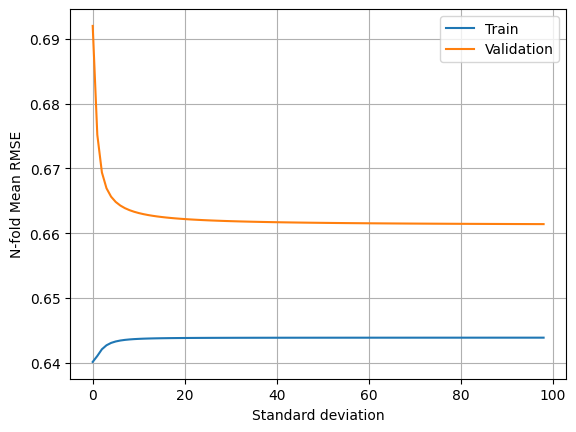

In [24]:
train_RMSE_mean_history = []
val_RMSE_mean_history = []
for s in range(1, 100):
    train_RMSE, val_RMSE = Cross_Validation(data_x_df.to_numpy(), data_t_df.to_numpy(), N, s, False)
    train_RMSE_mean_history.append(np.array(train_RMSE).mean())
    val_RMSE_mean_history.append(np.array(val_RMSE).mean()) 

plt.plot(train_RMSE_mean_history, '-',label="Train")
plt.plot(val_RMSE_mean_history,'-' ,label="Validation")
plt.legend()
plt.ylabel('N-fold Mean RMSE')
plt.xlabel('Standard deviation')
plt.grid(True)
plt.show()

## 2.3(a)

* Maximum likelihood consider the *likelihood probability*, and the goal is to minimize the cross-entropy between data and model
$$\theta_{MLE} = \argmax_{\theta}\ \sum_i \ln p(y_i| x_i,m , \theta)$$
* Maximu a posterior consider both *likelihood and posterior probability*, to find the $\theta$ which can maximize the conditional probability
$$\theta_{MAP} = \argmax_\theta \sum_i \ln p(y_i | x_i,m,\theta) + \textcolor{yellow}{\ln p(\theta | m)}$$

## 2.3(b)

* If we choose Gaussian distribution as a prior, it's equivalent to minimize the error function:
$$\frac{1}{2} \sum_{n=1}^N(t_n - w^\top\phi(x_n))^2 + \frac{\lambda}{2}w^\top w$$
* where $$w = (\lambda I + \Phi^\top\Phi)^{-1}\Phi^\top t$$

In [25]:
lambda_ = 0.5
I = np.identity(12)
M1_Weight_sigmoid = (np.linalg.inv( lambda_ *I + (Phi_matrix_train_M1_Sigmoid.T @ Phi_matrix_train_M1_Sigmoid)) @ Phi_matrix_train_M1_Sigmoid.T) @ y_train

In [26]:
M1_train_pred_sigmoid = np.dot(M1_Weight_sigmoid.T, Phi_matrix_train_M1_Sigmoid.T)
M1_val_pred_sigmoid = np.dot(M1_Weight_sigmoid.T, Phi_matrix_val_M1_Sigmoid.T)
M1_RMSE_train_sigmoid = RMSE(M1_train_pred_sigmoid, y_train.to_numpy().T)
M1_RMSE_val_sigmoid = RMSE(M1_val_pred_sigmoid, y_val.to_numpy().T)

In [27]:
print('M1_RMSE_train_sigmoid: ', M1_RMSE_train_sigmoid)
print('M1_RMSE_val_sigmoid: ', M1_RMSE_val_sigmoid)

M1_RMSE_train_sigmoid:  0.6407313443273223
M1_RMSE_val_sigmoid:  0.7137056693025319


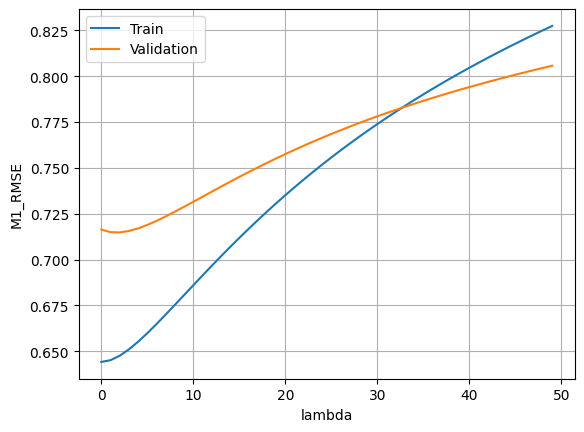

In [44]:
train_RMSE_mean_history = []
val_RMSE_mean_history = []
S = 0.5
for l in range(0, 50):
    Phi_matrix_train_M1_Sigmoid = Sigmoid(np.concatenate([(np.ones([1, len(X_train)]).T), X_train.to_numpy()], axis=1), S)
    Phi_matrix_val_M1_Sigmoid = Sigmoid(np.concatenate([np.ones([1, len(X_val)]).T, X_val.to_numpy()], axis=1), S)
    M1_Weight_sigmoid = (np.linalg.inv( l *I + (Phi_matrix_train_M1_Sigmoid.T @ Phi_matrix_train_M1_Sigmoid)) @ Phi_matrix_train_M1_Sigmoid.T) @ y_train
    M1_train_pred_sigmoid = np.dot(M1_Weight_sigmoid.T, Phi_matrix_train_M1_Sigmoid.T)
    M1_val_pred_sigmoid = np.dot(M1_Weight_sigmoid.T, Phi_matrix_val_M1_Sigmoid.T)
    M1_RMSE_train_sigmoid = RMSE(M1_train_pred_sigmoid, y_train.to_numpy().T)
    M1_RMSE_val_sigmoid = RMSE(M1_val_pred_sigmoid, y_val.to_numpy().T)
    train_RMSE_mean_history.append(M1_RMSE_train_sigmoid)
    val_RMSE_mean_history.append(M1_RMSE_val_sigmoid) 

plt.plot(train_RMSE_mean_history,'-', label="Train")
plt.plot(val_RMSE_mean_history, '-', label="Validation")
plt.legend()
plt.ylabel('M1_RMSE')
plt.xlabel('lambda')
plt.grid(True)
plt.show()

In [33]:
N = 5
S = 10 # Hyperparameter
lambda_ = 0.5
def Cross_Validation(data, target, N, S, lambda_, show_detail:bool):
    train_error_history = []
    val_error_history = []
    for i in range(N):
        # Split data to training set and validation set
        split_ratio = 1/N
        split_len = int(data.shape[0] * split_ratio)
        
        X_train = np.concatenate((data[:split_len*i,:], data[split_len*(i+1):,:]))
        X_val = data[split_len*i:split_len*(i+1),:]
        
        y_train = np.concatenate((target[:split_len*i,:], target[split_len*(i+1):,:]))
        y_val = target[split_len*i:split_len*(i+1),:]
            
        # Create Phi matrix
        Phi_matrix_train_M1_Sigmoid = Sigmoid(np.concatenate([(np.ones([1, len(X_train)]).T), X_train], axis=1), S)
        Phi_matrix_val_M1_Sigmoid = Sigmoid(np.concatenate([np.ones([1, len(X_val)]).T, X_val], axis=1), S)
        
        # Fitting
        M1_Weight_sigmoid = (np.linalg.inv( lambda_ *I + (Phi_matrix_train_M1_Sigmoid.T @ Phi_matrix_train_M1_Sigmoid)) @ Phi_matrix_train_M1_Sigmoid.T) @ y_train
        
        # Make prediction
        M1_train_pred_sigmoid = np.dot(M1_Weight_sigmoid.T, Phi_matrix_train_M1_Sigmoid.T)
        M1_val_pred_sigmoid = np.dot(M1_Weight_sigmoid.T, Phi_matrix_val_M1_Sigmoid.T)
        
        # Calculate RMSE
        M1_RMSE_train_sigmoid = RMSE(M1_train_pred_sigmoid, y_train.T)
        M1_RMSE_val_sigmoid = RMSE(M1_val_pred_sigmoid, y_val.T)
        
        train_error_history.append(M1_RMSE_train_sigmoid)
        val_error_history.append(M1_RMSE_val_sigmoid)

        # Show result
        if show_detail is True:
            print('N =', i)
            print('M1_RMSE_train_sigmoid: ', M1_RMSE_train_sigmoid)
            print('M1_RMSE_val_sigmoid: ', M1_RMSE_val_sigmoid)
            print('\n')

    return train_error_history, val_error_history

train_error_history, val_error_history = Cross_Validation(data_x_df.to_numpy(), data_t_df.to_numpy(), N, S, lambda_,True)
print('Average train RMSE: ', np.array(train_error_history).mean())
print('Average val RMSE: ', np.array(val_error_history).mean())

N = 0
M1_RMSE_train_sigmoid:  0.6659062802071781
M1_RMSE_val_sigmoid:  0.6607078104396609


N = 1
M1_RMSE_train_sigmoid:  0.6607229214098739
M1_RMSE_val_sigmoid:  0.6876645585689466


N = 2
M1_RMSE_train_sigmoid:  0.6593135400108383
M1_RMSE_val_sigmoid:  0.6842882844754303


N = 3
M1_RMSE_train_sigmoid:  0.6688081154348646
M1_RMSE_val_sigmoid:  0.6635397068606578


N = 4
M1_RMSE_train_sigmoid:  0.658812612897018
M1_RMSE_val_sigmoid:  0.6889106142335369


Average train RMSE:  0.6627126939919545
Average val RMSE:  0.6770221949156465


## 2.3(c)

In [49]:
# Maximum likelihood
M1_Weight_sigmoid = (np.linalg.inv((Phi_matrix_train_M1_Sigmoid.T @ Phi_matrix_train_M1_Sigmoid)) @ Phi_matrix_train_M1_Sigmoid.T) @ y_train
np.linalg.norm(M1_Weight_sigmoid)

6.7435627644548966

In [48]:
# Maxumum a posterior
M1_Weight_sigmoid = (np.linalg.inv( l *I + (Phi_matrix_train_M1_Sigmoid.T @ Phi_matrix_train_M1_Sigmoid)) @ Phi_matrix_train_M1_Sigmoid.T) @ y_train
np.linalg.norm(M1_Weight_sigmoid)

3.8870662901165827

From analysis the norm of weight matrix, the MAP's norm is smaller than MLE's, it's means that MAP consider the regularization term in the error function